In [1]:
!python --version

Python 3.10.12


In [8]:
!unzip drive/MyDrive/dataset.zip

Archive:  drive/MyDrive/dataset.zip
   creating: dataset/train/
   creating: dataset/train/abacaxi/
  inflating: dataset/train/abacaxi/Abacaxi.JPEG  
  inflating: dataset/train/abacaxi/Abacaxi2.JPEG  
  inflating: dataset/train/abacaxi/Abacaxi3.JPEG  
  inflating: dataset/train/abacaxi/Abacaxi4.JPEG  
   creating: dataset/train/abobrinha/
  inflating: dataset/train/abobrinha/Abobrinha.JPEG  
  inflating: dataset/train/abobrinha/Abobrinha2.JPEG  
  inflating: dataset/train/abobrinha/Abobrinha3.JPEG  
   creating: dataset/train/alface/
  inflating: dataset/train/alface/Alface.JPEG  
  inflating: dataset/train/alface/Alface2.JPEG  
  inflating: dataset/train/alface/Alface3.JPEG  
   creating: dataset/train/alho/
  inflating: dataset/train/alho/Alho.JPEG  
  inflating: dataset/train/alho/Alho2.JPEG  
  inflating: dataset/train/alho/Alho3.JPEG  
   creating: dataset/train/arroz/
  inflating: dataset/train/arroz/Arroz.JPEG  
  inflating: dataset/train/arroz/Arroz2.JPEG  
  inflating: dataset

In [7]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import glob # to find files recursively

import keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
path_resized = "dataset/train_resized/"

(2048, 1536, 3)
(307, 230, 3)


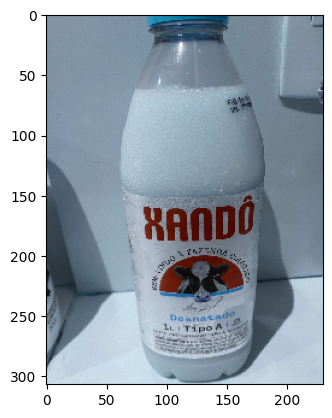

In [5]:
path = "dataset/train/"

file_list = []

for root, dirs, files in os.walk(path):
  if len(files)>0:
    for file in files:
      file_list.append(f'{root}/{file}')

image = cv2.imread(file_list[0])
half = cv2.resize(image, (0, 0), fx = 0.15, fy = 0.15)

print(image.shape)
print(half.shape)

plt.imshow(half)
plt.show()

In [13]:
#path_resized = "dataset/train_resized/"

for image_path in file_list:
  category = image_path.split('/')[2]

  if not os.path.isdir(os.path.join(path_resized, category)):
    os.mkdir(os.path.join(path_resized, category))

  image = cv2.imread(image_path)
  half = cv2.resize(image, (0, 0), fx = 0.15, fy = 0.15)

  half_name = image_path.split('/')[-1]

  cv2.imwrite(os.path.join(f'{path_resized}/{category}/', half_name), half)



In [23]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale = 1./255., # Rescaling
#     rotation_range = 40, # for augmentation
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True
# )

data_augmentation = keras.Sequential(
  [
  RandomFlip("horizontal",
                      input_shape=(307,230,
                                  3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ]
)

In [25]:
train_path = path_resized
image_size = (307, 230)
batch_size = 16

# train_generator = train_datagen.flow_from_directory(
#     train_path,
#     batch_size = batch_size,
#     class_mode = 'categorical',
#     target_size = image_size
# )

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.0,
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 116 files belonging to 32 classes.


In [26]:
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip( images_arr, axes):
#         ax.imshow(img)
#     plt.tight_layout()
#     plt.show()


# augmented_images = [train_generator[0][0][0] for i in range(10)]
# plotImages(augmented_images)

train_generator[0][0][0].shape

(307, 230, 3)

In [27]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'abacaxi',
 1: 'abobrinha',
 2: 'alface',
 3: 'alho',
 4: 'arroz',
 5: 'aveia',
 6: 'bacon',
 7: 'banana',
 8: 'batata',
 9: 'biscoito_oreo',
 10: 'brocolis',
 11: 'chocolate',
 12: 'couve_flor',
 13: 'filet_mignon',
 14: 'ketchup',
 15: 'laranja',
 16: 'leite',
 17: 'limao',
 18: 'linguica',
 19: 'maca',
 20: 'macarrao',
 21: 'manteiga',
 22: 'mortadela',
 23: 'mostarda',
 24: 'ovo',
 25: 'pao',
 26: 'pera',
 27: 'queijo_mussarela',
 28: 'salmao',
 29: 'sobrecoxa_frango',
 30: 'sucrilhos',
 31: 'tomate'}

In [28]:
no_classes = len(labels)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [30]:
# Create the model

kernel = 3
downscale = 2
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255, input_shape=(307, 230, 3))),
model.add(Conv2D(
        32, kernel,padding = 'same',
        activation = 'relu'))
model.add(MaxPooling2D(
        pool_size = (downscale, downscale)))
model.add(Conv2D(
        64, kernel,padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(
        pool_size = (downscale, downscale)))
model.add(Conv2D(
        64, kernel,padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(
        pool_size = (downscale, downscale)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes))

# Display a model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 307, 230, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 307, 230, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 307, 230, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 153, 115, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 153, 115, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 76, 57, 64)        0         
 ng2D)                                                

In [33]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(),
              metrics=['accuracy']
             )

# Start training
model.fit(
        train_ds,
        epochs =10,
        shuffle = False
)

Epoch 1/10
8/8 [==============================] - 3s 47ms/step - loss: 14.4918 - accuracy: 0.0345
Epoch 2/10
8/8 [==============================] - 0s 37ms/step - loss: 3.4779 - accuracy: 0.0517
Epoch 3/10
8/8 [==============================] - 0s 36ms/step - loss: 3.3833 - accuracy: 0.0776
Epoch 4/10
8/8 [==============================] - 0s 40ms/step - loss: 3.3340 - accuracy: 0.0690
Epoch 5/10
8/8 [==============================] - 0s 35ms/step - loss: 3.0921 - accuracy: 0.1034
Epoch 6/10
8/8 [==============================] - 0s 34ms/step - loss: 2.8917 - accuracy: 0.2069
Epoch 7/10
8/8 [==============================] - 0s 33ms/step - loss: 2.6309 - accuracy: 0.2586
Epoch 8/10
8/8 [==============================] - 0s 33ms/step - loss: 2.2366 - accuracy: 0.4138
Epoch 9/10
8/8 [==============================] - 0s 33ms/step - loss: 2.0748 - accuracy: 0.4138
Epoch 10/10
8/8 [==============================] - 0s 33ms/step - loss: 1.9033 - accuracy: 0.5172
